**DATA CLEANING**

# NOTE--> FIRST CLEAN tour_logs_test_input.csv by executing cells in this order  (##[])

**[1]->[2]->[3]->[4]->[5]->[10]->[16]->[20] then you can upload tour_logs_train.csv in [2] and run all cell**

because test data does not have crowd energy column

In [142]:
#[1]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
#[2]
df=pd.read_csv('tour_logs_train.csv')

In [144]:
#[3]
df['Show_DateTime']=df['Show_DateTime'].astype(str)

month_map = {
    'January ': '2024-01-',
    'February ': '2024-02-',
    'March ': '2024-03-',
    'April ': '2024-04-',
    'May ': '2024-05-',
    'June ': '2024-06-',
    'July ': '2024-07-',
    'August ': '2024-08-',
    'September ': '2024-09-',
    'October ': '2024-10-',
    'November ': '2024-11-',
    'December ': '2024-12-'
}


for month_name, replacement in month_map.items():
    df['Show_DateTime'] = df['Show_DateTime'].str.replace(month_name, replacement, regex=False)


df['Show_DateTime'] = [date.replace('/', '-') for date in df['Show_DateTime']]

df['Show_DateTime'] = [date.replace(' 2024', ' 00:00:00') for date in df['Show_DateTime']]

month_map = {
    'January ': '2024-01-',
    'February ': '2024-02-',
    'March ': '2024-03-',
    'April ': '2024-04-',
    'May ': '2024-05-',
    'June ': '2024-06-',
    'July ': '2024-07-',
    'August ': '2024-08-',
    'September ': '2024-09-',
    'October ': '2024-10-',
    'November ': '2024-11-',
    'December ': '2024-12-'
}


for month_name, replacement in month_map.items():
    df['Show_DateTime'] = df['Show_DateTime'].str.replace(month_name, replacement, regex=False)

time_of_day_map = {
    'Morning': '2024-01-01 08:00:00',
    'Afternoon': '2024-01-01 14:00:00',
    'Evening': '2024-01-01 19:00:00',
    'Late Night': '2024-01-01 23:00:00'
}


for text, timestamp in time_of_day_map.items():
    df['Show_DateTime'] = df['Show_DateTime'].str.replace(text, timestamp, regex=False)

df['Show_DateTime'] = df['Show_DateTime'].str.replace(r'( \d{1,2}:\d{2})$', r'\1:00', regex=True)

df['Show_DateTime'] = pd.to_datetime(df['Show_DateTime'], format='mixed')

In [145]:
#[4]
df['Ticket_Price']=df['Ticket_Price'].astype(str)
df['Ticket_Price'] = [y.replace('$', '') for y in df['Ticket_Price']]

price=[]

for x in df['Ticket_Price']:

  if "£" in x:
    x=float(x.replace("£",""))
    z=x*1.27
  elif "€" in x:
    x=float(x.replace("€",""))
    z=x*1.09
  elif " USD" in x:
    z=float(x.replace(" USD",""))

  elif "VIP" in x:
    a=float(x[0:x.index(' ')])
    b=float(x[x.index(':')+2:x.index(')')])
    z=a*0.9+b*0.1
  elif "Free" in x:
    z=0.00
  else:
    z=float(x)
  price.append(z)
df['Ticket_Price']=price

df['Ticket_Price'] = df['Ticket_Price'].round(2)

In [146]:
#[5]
df_clean = df.copy()
df_clean.loc[df_clean['Ticket_Price'] > 150, 'Ticket_Price'] = np.nan
df_clean.loc[df_clean['Ticket_Price'] < 0, 'Ticket_Price'] = np.nan



df_clean.loc[df_clean['Crowd_Size'] > 1000, 'Crowd_Size'] = np.nan
df_clean.loc[df_clean['Crowd_Size'] <= 0, 'Crowd_Size'] = np.nan
df_clean = df_clean.dropna(subset=['Crowd_Size'])

df_clean.loc[df_clean['Volume_Level'] > 11, 'Volume_Level'] = np.nan
df_clean.loc[df_clean['Volume_Level'] < 1, 'Volume_Level'] = np.nan

df_clean['Show_DateTime'] = pd.to_datetime(df_clean['Show_DateTime'], format='mixed')
df_clean['Hour']=df_clean['Show_DateTime'].dt.hour
df_clean['Month']=df_clean['Show_DateTime'].dt.month




df_clean.loc[df_clean['Hour'] < 1, 'Hour'] = np.nan



for col in ['Volume_Level', 'Ticket_Price', 'Crowd_Size', 'Hour']:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())


df_clean=df_clean[df_clean['Crowd_Size']> 0]

df_clean['Time_Slot'] = pd.cut(df_clean['Hour'],
                         bins=[0, 12, 17, 21, 24],
                         labels=['Morning', 'Afternoon', 'Evening', 'Night'])

# **DO NOT EXECUTE THIS CELL WHILE CLEANING tour_logs_test_input.csv**

In [147]:
#[6]
df_clean.loc[df_clean['Crowd_Energy'] > 100, 'Crowd_Energy'] = np.nan
df_clean.loc[df_clean['Crowd_Energy'] < 0, 'Crowd_Energy'] = np.nan
df_clean = df_clean.dropna(subset=['Crowd_Energy'])
df_clean=df_clean[df_clean['Crowd_Energy']> 0]

# **EDA AND CROSSCHECKING THE SCRIBBLES😈**

In [148]:
#[7]
import matplotlib.pyplot as plt
import seaborn as sns

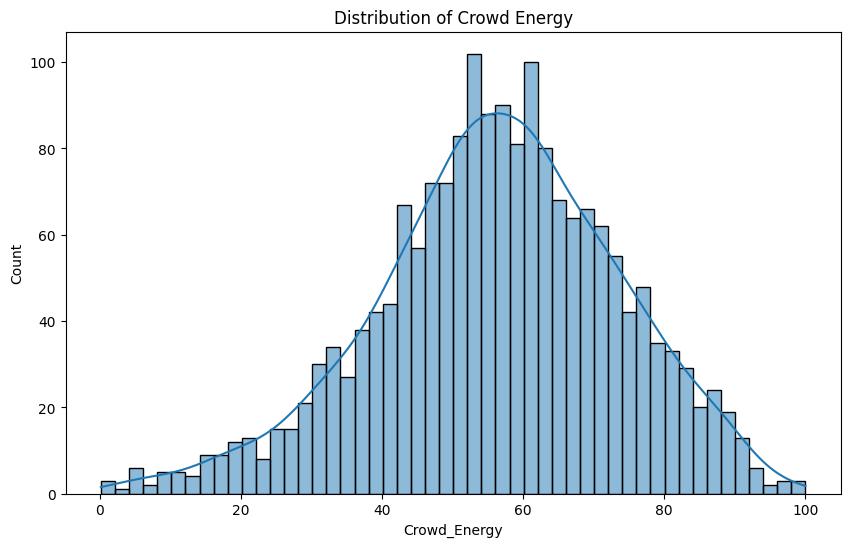

In [149]:
#[8]
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Crowd_Energy'], bins=50, kde=True)
plt.title('Distribution of Crowd Energy')
plt.show()

# **Tuesday shows are cursed ???**😥

<Axes: xlabel='Day_of_Week', ylabel='Crowd_Energy'>

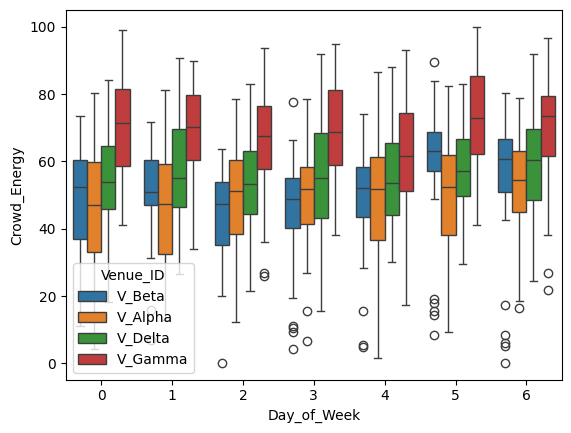

In [150]:
#[9]
sns.boxplot(x="Day_of_Week", y="Crowd_Energy",hue="Venue_ID", data=df_clean)

**NO TUESDAYS ARE NOT CURSED BUT WEEKENDS ARE MORE ENERGETIC SO THERE SHOULD BE A WEEKEND FLAG COLUMN**

In [151]:
#[10]
flag = []
for x in df_clean['Day_of_Week']:
   if x == 5 or x == 6:
    flag.append(1)
   else:
    flag.append(0)

df_clean['Weekend_flag']=flag

# **VOLUME KILLS ENERGY IN MONASTERY, BUT HELPS ELSEWHERE**🤣

# **ALSO I THINK LOUDER IS BETTER AT V_DELTA?**

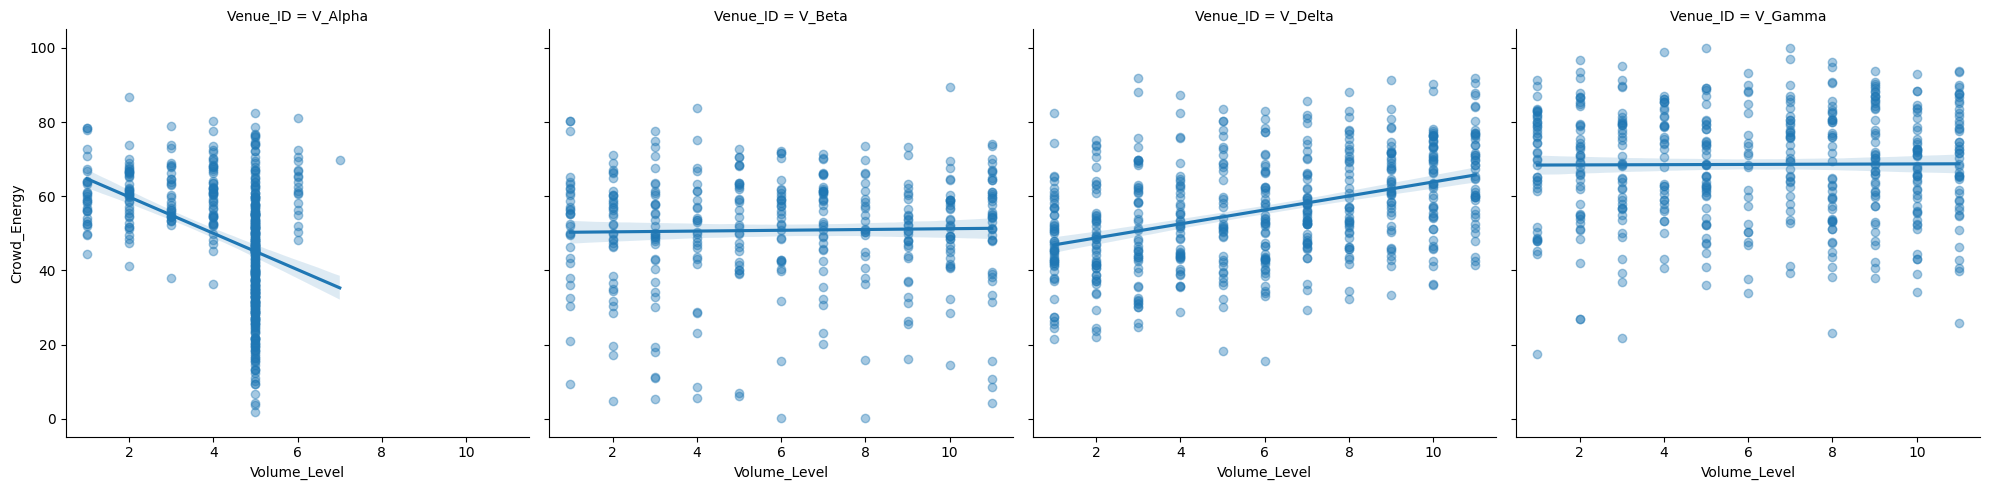

In [152]:
#[11]
sns.lmplot(
    x="Volume_Level",
    y="Crowd_Energy",
    col="Venue_ID",
    data=df_clean,
    scatter_kws={"alpha":0.4}
)


**YES ITS MOSTLY TRUE**

# GOTHS '😏' ONLY **COME** ALIVE AT NIGHT

/tmp/ipython-input-4105809720.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


<Axes: xlabel='Hour', ylabel='Crowd_Energy'>

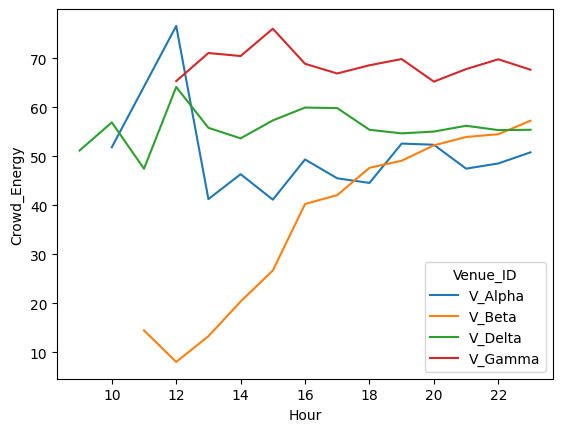

In [153]:
#[12]
sns.lineplot(
    x="Hour",
    y="Crowd_Energy",
    hue="Venue_ID",
    data=df_clean,
    estimator="mean",
    ci=None
)


**YES GOTHIC NIGHTCLUB IS MORE ENERGETIC IN NIGHT**

# **FULL MOON = MAGIC🌕**

<Axes: xlabel='Moon_Phase', ylabel='Crowd_Energy'>

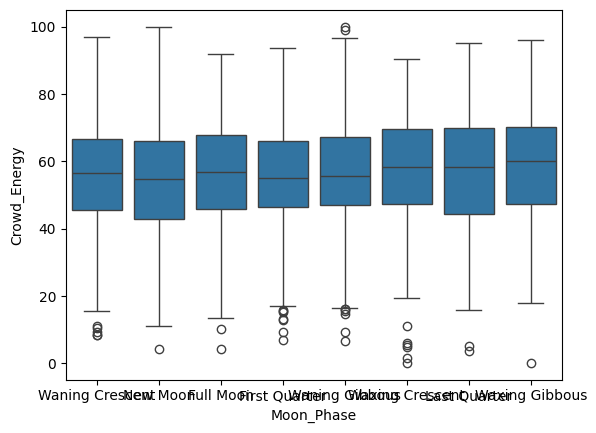

In [154]:
#[13]
sns.boxplot(x="Moon_Phase", y="Crowd_Energy", data=df_clean)


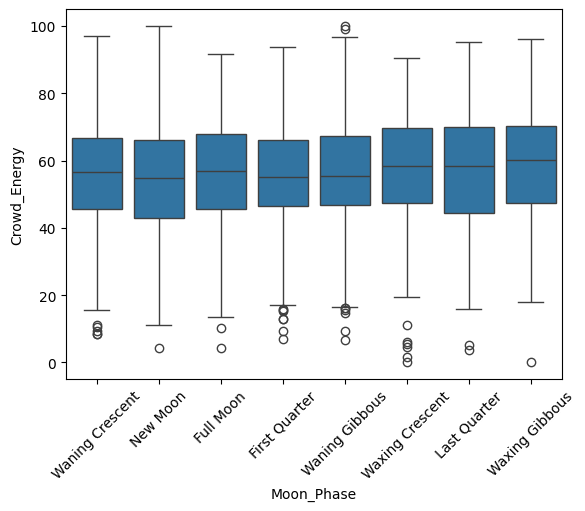

In [155]:
#[14]
sns.boxplot(x="Moon_Phase", y="Crowd_Energy", data=df_clean)
plt.xticks(rotation=45)

plt.show()

**IT IS CLEARLY FALSE**

# **RAIN RUINS SHOWS… OR JUST MY MOOD?**

<Axes: xlabel='Weather', ylabel='Crowd_Energy'>

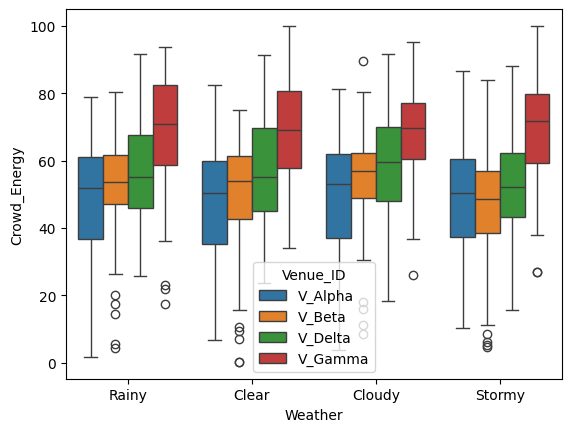

In [156]:
#[15]
sns.boxplot(
    x="Weather",
    y="Crowd_Energy",
    hue="Venue_ID",
    data=df_clean
)

**RAIN DO AFFECT BUT NOT SEVERLY**

In [157]:
#[16]
bad_weather = []
for x in df_clean['Weather']:
   if x == 'Rainy' or x == 'Stormy':
    bad_weather.append(1)
   else:
    bad_weather.append(0)

df_clean['bad_weather']=bad_weather

# **V_GAMMA IS PRICE SENSITIVE ??**

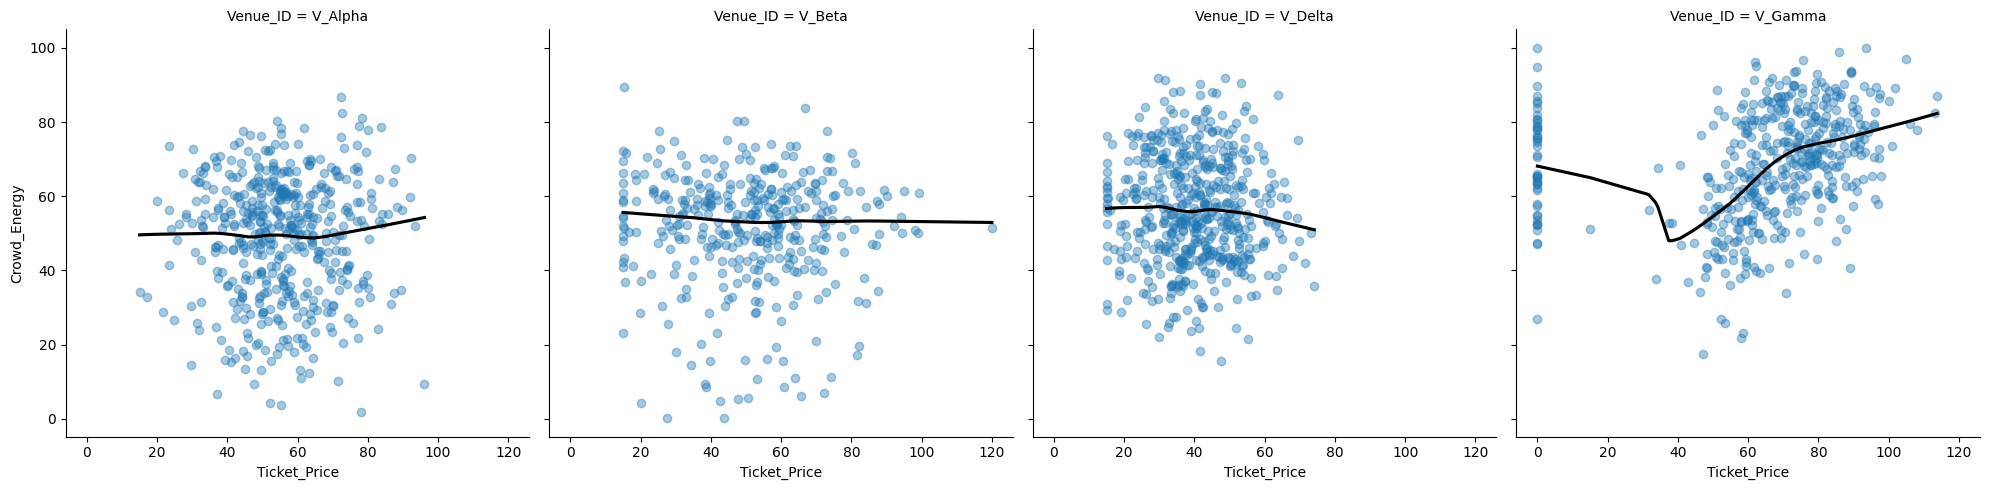

In [187]:
#[17]
sns.lmplot(
    x="Ticket_Price",
    y="Crowd_Energy",
    data=df_clean,
    lowess=True,
     col="Venue_ID",
    scatter_kws={"alpha":0.4},
    line_kws={"color": "Black"}
)

**V_GAMMA MORE PRICE RESULT MORE ENERGY and sensitive**

# **V_DELTA IS PURE CHAOS. NO RULES. JUST VIBES**

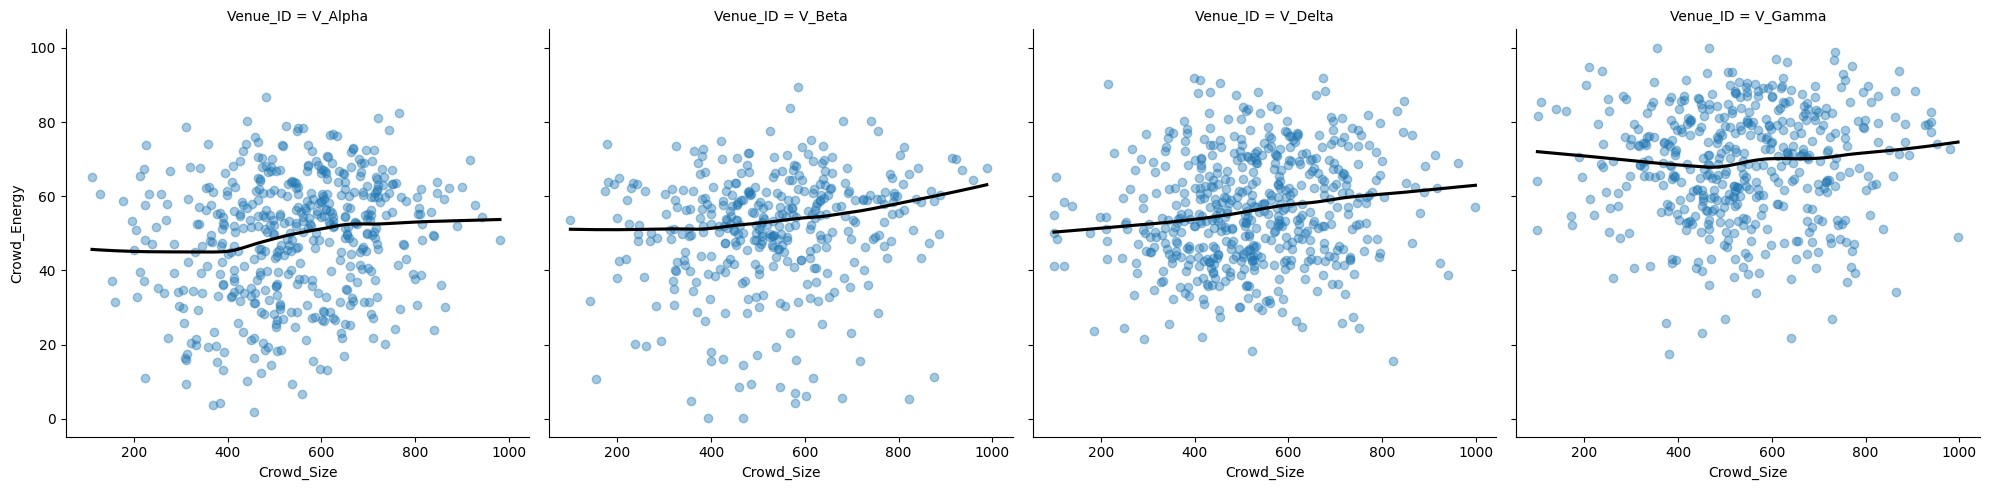

In [186]:
#[18]
sns.lmplot(
    x="Crowd_Size",
    y="Crowd_Energy",
    col="Venue_ID",
    data=df_clean,
    lowess=True,
    scatter_kws={"alpha":0.4},
    line_kws={"color": "Black"}
)

**IN V_DELTA MORE CROWD MEANS MORE ENERGY**

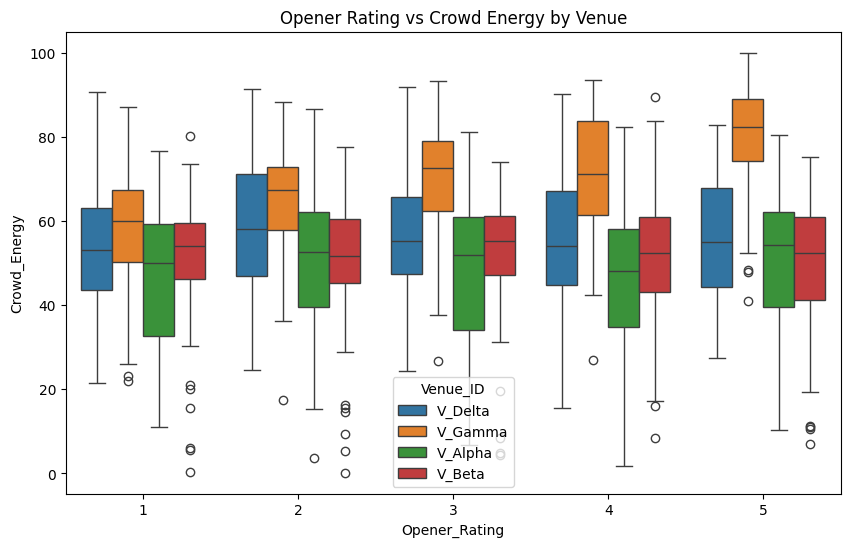

In [160]:
#[19]
plt.figure(figsize=(10,6))
sns.boxplot(
    x="Opener_Rating",
    y="Crowd_Energy",
    hue="Venue_ID",
    data=df_clean
)
plt.title("Opener Rating vs Crowd Energy by Venue")
plt.show()


**THIS WILL GIVE CLEANED tour_logs_test_input this will be used later**

In [161]:
#[20]
df_clean.to_csv('final_cleaned.csv', index=False)

# **CHECKING WHICH MODEL TO CHOOSE**

**ENCODING CATEGORICAL COLUMN**

**NOT USING Merch_Sales_Post_Show (DATA LEAKAGE)**

**MOON_PHASE IS  JUST NOISE NOTHING CAN BE ACTUALLY DETERMINED FROM THAT**

In [162]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


X = df_clean.drop(columns=['Crowd_Energy'])
y = df_clean['Crowd_Energy']


categorical_cols = ['Venue_ID', 'Weather','Band_Outfit','Time_Slot']
numerical_cols = ['Day_of_Week', 'Volume_Level', 'Crowd_Size', 'Opener_Rating', 'Ticket_Price', 'Hour','Weekend_flag']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





# **NOW WILL TRAIN MULTIPLE MODEL AND COMPARE WHICH WILL DO BEST**

**POLYNOMIAL REGRESSION (USED RANDOMISEDSEARCHCV) WHICH 1] Uses 5-fold cross validation 2]Evaluates using Mean Squared Error**

In [163]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

poly_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('regressor', LinearRegression())
])

poly_param_dist = {
    'poly__degree': [2, 3, 4],
    'poly__interaction_only': [False, True]
}

poly_search = RandomizedSearchCV(
    poly_pipeline,
    param_distributions=poly_param_dist,
    n_iter=6,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

poly_search.fit(X_train, y_train)

poly_best = poly_search.best_estimator_
poly_pred = poly_best.predict(X_test)

print("Polynomial Best Params:", poly_search.best_params_)
print("Polynomial RMSE:", np.sqrt(mean_squared_error(y_test, poly_pred)))
print("Polynomial R2:", r2_score(y_test, poly_pred))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Polynomial Best Params: {'poly__interaction_only': False, 'poly__degree': 2}
Polynomial RMSE: 13.26523059909034
Polynomial R2: 0.2758843225955606


**SAME DID WITH SUPPORT VECTOR REGRESSION**

In [164]:
from sklearn.svm import SVR

svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('regressor', SVR())
])

svr_param_dist = {
    'regressor__kernel': ['rbf', 'poly'],
    'regressor__C': [0.1, 1, 10, 50, 100],
    'regressor__epsilon': [0.01, 0.1, 0.2],
    'regressor__gamma': ['scale', 'auto']
}

svr_search = RandomizedSearchCV(
    svr_pipeline,
    param_distributions=svr_param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

svr_search.fit(X_train, y_train)

svr_best = svr_search.best_estimator_
svr_pred = svr_best.predict(X_test)

print("SVR Best Params:", svr_search.best_params_)
print("SVR RMSE:", np.sqrt(mean_squared_error(y_test, svr_pred)))
print("SVR R2:", r2_score(y_test, svr_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
SVR Best Params: {'regressor__kernel': 'rbf', 'regressor__gamma': 'scale', 'regressor__epsilon': 0.01, 'regressor__C': 50}
SVR RMSE: 13.001468886540904
SVR R2: 0.3043942165223733


**DECISION TREE REGRESSOR**

In [165]:
from sklearn.tree import DecisionTreeRegressor

dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', DecisionTreeRegressor(random_state=42))])

dt_param_dist = {

    'regressor__max_depth': [None, 5, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10, 20],
    'regressor__min_samples_leaf': [1, 2, 5, 10],
    'regressor__max_features': [None, 'sqrt', 'log2']
}

dt_search = RandomizedSearchCV(dt_pipeline , param_distributions=dt_param_dist, n_iter=30, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42, verbose=1)

dt_search.fit(X_train, y_train)

dt_best = dt_search.best_estimator_
dt_pred = dt_best.predict(X_test)

print("Decision Tree Best Params:", dt_search.best_params_)
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, dt_pred)))
print("Decision Tree R2:", r2_score(y_test, dt_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Decision Tree Best Params: {'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 10, 'regressor__max_features': None, 'regressor__max_depth': 10}
Decision Tree RMSE: 13.604111484157151
Decision Tree R2: 0.238414430073293


**RANDOM FOREST REGRESSOR**

In [166]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))])

rf_param_dist = {

    'regressor__n_estimators': [200, 300, 500, 800],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2']
}

rf_search = RandomizedSearchCV(rf_pipeline,param_distributions=rf_param_dist,n_iter=30,cv=5,scoring='neg_mean_squared_error',n_jobs=-1,random_state=42,verbose=1)

rf_search.fit(X_train, y_train)

rf_best = rf_search.best_estimator_
rf_pred = rf_best.predict(X_test)

print("Random Forest Best Params:", rf_search.best_params_)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("Random Forest R2:", r2_score(y_test, rf_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Random Forest Best Params: {'regressor__n_estimators': 800, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'log2', 'regressor__max_depth': 10}
Random Forest RMSE: 12.841367709619414
Random Forest R2: 0.32142023295410005


**GRADIENT BOOSTING REGRESSOR**

In [167]:
from sklearn.ensemble import GradientBoostingRegressor
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', GradientBoostingRegressor(random_state=42))])


param_dist = {

    'regressor__n_estimators': [100, 200, 300, 500],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5, 6],
    'regressor__subsample': [0.7, 0.8, 0.9, 1.0],
    'regressor__min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(model_pipeline, param_distributions=param_dist,n_iter=20, cv=5, scoring='neg_mean_squared_error',verbose=1, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)


best_model = random_search.best_estimator_


gbr_pred = best_model.predict(X_test)

print("Best gbr Parameters", random_search.best_params_)
print("GBR Test RMSE:", np.sqrt(mean_squared_error(y_test, gbr_pred)))
print("GBR Test R2:", r2_score(y_test, gbr_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best gbr Parameters {'regressor__subsample': 0.7, 'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, 'regressor__max_depth': 6, 'regressor__learning_rate': 0.01}
GBR Test RMSE: 12.27096862761722
GBR Test R2: 0.3803648674981528


**XG BOOST**

In [168]:
from xgboost import XGBRegressor

xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', XGBRegressor(objective='reg:squarederror',random_state=42,n_jobs=-1))])

xgb_param_dist = {
    'regressor__n_estimators': [300, 500, 800, 1000],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 5, 7, 9],
    'regressor__subsample': [0.7, 0.8, 0.9, 1.0],
    'regressor__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'regressor__gamma': [0, 0.1, 0.3],
    'regressor__reg_alpha': [0, 0.1, 1],
    'regressor__reg_lambda': [1, 1.5, 2]
}

xgb_search = RandomizedSearchCV(estimator=xgb_pipeline,param_distributions=xgb_param_dist,n_iter=30,scoring='neg_mean_squared_error',cv=5,verbose=1,random_state=42,n_jobs=-1)

xgb_search.fit(X_train, y_train)

best_xgb = xgb_search.best_estimator_
xgb_pred = best_xgb.predict(X_test)


print("Best XGBoost Parameters", xgb_search.best_params_)
print("XGBoost Test RMSE:", np.sqrt(mean_squared_error(y_test, xgb_pred)))
print("XGBoost Test R2:", r2_score(y_test, xgb_pred))



Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best XGBoost Parameters {'regressor__subsample': 1.0, 'regressor__reg_lambda': 1, 'regressor__reg_alpha': 1, 'regressor__n_estimators': 300, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.01, 'regressor__gamma': 0.1, 'regressor__colsample_bytree': 0.7}
XGBoost Test RMSE: 12.326320425100437
XGBoost Test R2: 0.3747621681818586


# **GRADIENT BOOSTING REGRESSOR HAS MINIMUM RMSE SO USING TRAIN THIS MODEL WITH BEST PARAM**

**TRAINING THE MODEL WITH CLEANED tour_logs_train.csv**

In [169]:
X_train_full = df_clean.drop(columns=['Crowd_Energy'])
y_train_full = df_clean['Crowd_Energy']



In [170]:
categorical_cols = ['Venue_ID', 'Weather', 'Band_Outfit', 'Time_Slot']
numerical_cols = [
    'Day_of_Week', 'Volume_Level', 'Crowd_Size',
    'Opener_Rating', 'Ticket_Price', 'Hour', 'Weekend_flag'
]


In [171]:
preprocessor = ColumnTransformer(transformers=[('num', 'passthrough', numerical_cols),('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])


In [172]:
final_gbr_model = Pipeline(steps=[('preprocessor', preprocessor),('regressor', GradientBoostingRegressor(n_estimators=200,learning_rate=0.01,max_depth=6,subsample=0.7,min_samples_split=2,random_state=42))])


In [173]:
final_gbr_model.fit(X_train_full, y_train_full)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Day_of_Week',
                                                   'Volume_Level', 'Crowd_Size',
                                                   'Opener_Rating',
                                                   'Ticket_Price', 'Hour',
                                                   'Weekend_flag']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Venue_ID', 'Weather',
                                                   'Band_Outfit',
                                                   'Time_Slot'])])),
                ('regressor',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=6,
                                           n_estimators=200, random_state=42,
                                           subsample=0.7))])

**LOADING CLEANED tour_logs_test_input.csv**

In [174]:
df_test=pd.read_csv('/content/final_cleaned.csv')

In [175]:
X_new = df_test.drop(columns=['Gig_ID'])
df_new=df_test[['Gig_ID']]



**PREDICTING THE CROWD_ENERGY**

In [176]:
predicted_energy = final_gbr_model.predict(X_new)

In [177]:
df_new['Crowd_Energy'] = predicted_energy



/tmp/ipython-input-2101126671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Crowd_Energy'] = predicted_energy


# **DURING CLEANING OF tour_logs_test_input.csv some of GIG_ID'S were removed so firstly i am merging Gig_ID column of tour_logs_input.csv then all the missing Gig_ID will have Nan crowd energy and then replacing it with median of column**

In [178]:

gig=pd.read_csv('/content/tour_logs_test_input.csv')

In [179]:
gig=pd.read_csv('/content/tour_logs_test_input.csv')
gig_ids = gig['Gig_ID']
df_new = df_new.set_index('Gig_ID').reindex(gig_ids).reset_index()
print(df_new)

       Gig_ID  Crowd_Energy
0    Gig_0000     46.842830
1    Gig_0001     52.794585
2    Gig_0002     53.179505
3    Gig_0003           NaN
4    Gig_0004     64.034746
..        ...           ...
495  Gig_0495     44.109852
496  Gig_0496     56.873228
497  Gig_0497     50.044540
498  Gig_0498     59.822034
499  Gig_0499     39.881853

[500 rows x 2 columns]


In [180]:
median_value = df_new['Crowd_Energy'].median()
df_new['Crowd_Energy'] = df_new['Crowd_Energy'].fillna(median_value)


In [181]:
df_new.to_csv("predictions.csv", index=False)

In [182]:
df_clean1=df_clean[df_clean['Venue_ID'] == 'V_Alpha']
df_clean2=df_clean[df_clean['Venue_ID'] == 'V_Beta']
df_clean3=df_clean[df_clean['Venue_ID'] == 'V_Gamma']
df_clean4=df_clean[df_clean['Venue_ID'] == 'V_Delta' ]

df_clean3.head()

,Gig_ID,Venue_ID,Show_DateTime,Day_of_Week,Volume_Level,Ticket_Price,Crowd_Size,Opener_Rating,Weather,Moon_Phase,Band_Outfit,Merch_Sales_Post_Show,Crowd_Energy,Hour,Month,Time_Slot,Weekend_flag,bad_weather
6,Gig_0006,V_Gamma,2024-04-09 19:00:00,1,4.0,69.46,107.0,3,Clear,New Moon,Leather,1372,85.45,19.0,4,Evening,0,0
8,Gig_0008,V_Gamma,2024-03-12 17:00:00,1,8.0,48.05,539.0,5,Clear,New Moon,Leather,583,40.85,17.0,3,Afternoon,0,0
11,Gig_0011,V_Gamma,2024-03-21 17:00:00,3,4.0,59.63,425.0,1,Stormy,First Quarter,Leather,642,53.20,17.0,3,Afternoon,0,1
12,Gig_0012,V_Gamma,2024-06-25 20:00:00,1,11.0,79.31,441.0,3,Rainy,Waning Gibbous,Leather,946,61.55,20.0,6,Evening,0,1
13,Gig_0013,V_Gamma,2024-05-30 23:00:00,3,4.0,48.40,694.0,3,Clear,Waning Gibbous,Spandex,540,40.54,23.0,5,Night,0,0


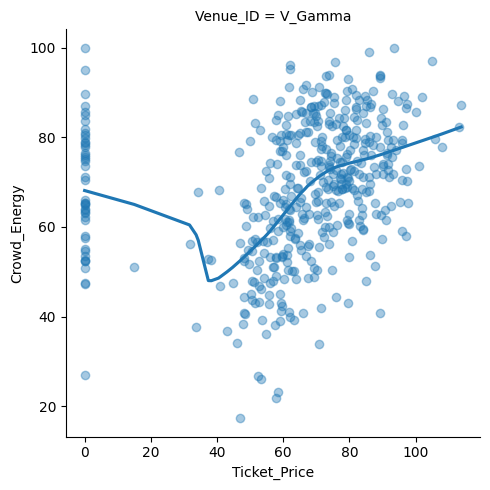

In [183]:
sns.lmplot(
    x="Ticket_Price",
    y="Crowd_Energy",
    data=df_clean3,
    lowess=True,
     col="Venue_ID",
    scatter_kws={"alpha":0.4}
)

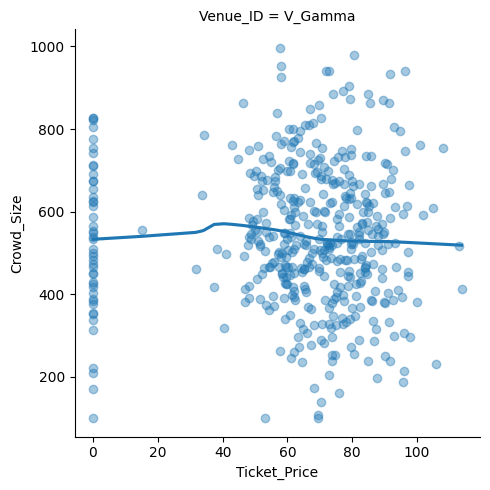

In [184]:
sns.lmplot(
    x="Ticket_Price",
    y="Crowd_Size",
    data=df_clean3,
    lowess=True,
     col="Venue_ID",
    scatter_kws={"alpha":0.4}
)

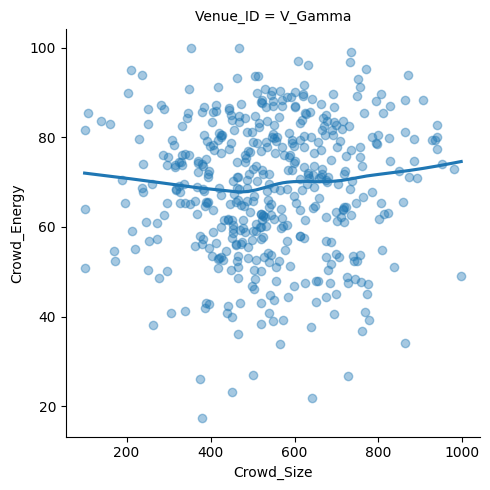

In [185]:
sns.lmplot(
    x="Crowd_Size",
    y="Crowd_Energy",
    data=df_clean3,
    lowess=True,
     col="Venue_ID",
    scatter_kws={"alpha":0.4}
)